# Microsoft Movie Studio Analysis

## Overview
This project aims to provide guide for decision making for Microsoft Movie. It analyzes three datasets using python and the findings are that animated genre produce highest net profit.

## Business Problem

Microsoft has a new movie studio and would like to produce movies that would bring in profits and enjoyed by the audience. The objective is to gain comprehensive insights into the characteristics and genres that resonate most with audiences.

In [1]:
# Import Python necessary  package essential for our analysis
import sqlite3 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import zipfile
%matplotlib inline

## Data Preparation

## 1. The im.db dataset
It contains multiple tables but the tables of interest are **<span style = "color: orange">movie_basics</span>** and **<span style = "color: orange">movie_ratings</span>** where the ***averagerating*** and ***runtime_minutes*** will be used to determine the ideal length of movie.

1.1 Viewing the tables in the database

In [2]:
with zipfile.ZipFile("./Datasets/im.db.zip", "r") as zipFiles:
    zipFiles.extractall("Datasets")

In [3]:
# Loading imb.db dataset and connecting to the database
conn = sqlite3.connect('./Datasets/im.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
for table_name in cur:
    print(table_name)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


1.2.1 Tables of interest

>Movie_rating

In [4]:
query = """  SELECT * FROM movie_ratings  """
movie_ratings = pd.read_sql(query, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


>1.2.2 Movie_basics

In [5]:
query2 = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(query2, conn)
movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


1.3 Merging both movie_rating and Movie basic tables
>The merged table is stored in a **<span style = "color: orange">imb_moviesRatings</span>**

In [6]:
imb_moviesRatings = pd.merge(movie_ratings, movie_basics, 
                               left_on='movie_id', right_on='movie_id')
imb_moviesRatings.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


1.4 Dropping Irrelevant files
 - **<span style = "color: orange">original title</span>**
          :This column would not provide any useful information
  -  **<span style = "color: orange">genres</span>**
          :It wont be needed in this part of analysis

In [7]:
imbReviews_clean = imb_moviesRatings.drop(columns = ['original_title', 'genres'])
imbReviews_clean.head()

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0
1,tt10384606,8.9,559,Borderless,2019,87.0
2,tt1042974,6.4,20,Just Inès,2010,90.0
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0
4,tt1060240,6.5,21,Até Onde?,2011,73.0


## 2.TN Dataset

In [8]:
# Load your tnMovie dataset
tnMovie_data = pd.read_csv('./Datasets/tn.movie_budgets.csv.gz', parse_dates=['release_date'])
tnMovie_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


2.1 Dropping columns
 - **<span style = "color: orange">id</span>**
          :Not relevant
  -  **<span style = "color: orange">domestic_gross</span>**
          :foreign gross is much more intresting

In [9]:
tnMovie_dataClean = tnMovie_data.drop(columns = ['id', 'domestic_gross'])
tnMovie_dataClean.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,"$425,000,000","$2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,2019-06-07,Dark Phoenix,"$350,000,000","$149,762,350"
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


## 3. TMDB Dataset

In [10]:
tmdbMovies = pd.read_csv("./Datasets/tmdb.movies.csv.gz", index_col = 0,  parse_dates=['release_date'])
# here we specify the index column otherwise we'd have a duplicated index column
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


3.1 Dropping unnecessary columns
1. **<span style = "color: orange">id</span>**: its not needed in the analysis.
2. **<span style = "color: orange">original_title</span>**: There are two title. For this analysis       thelast title column was chosen.
3. **<span style = "color: orange">popularity</span>**: Not relevant for this analysis.
4. **<span style = "color: orange">original_language</span>**: Not relevant for this analysis.

In [11]:
tmdbMovies_clean = tmdbMovies.drop(['id', 'original_title', 'popularity', 'original_language'], axis =1)
tmdbMovies_clean.head()

,genre_ids,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186


## Renaming column names

Inorder to merge columns from  different datasets, they need to have a similar column name in both tables.

In [12]:
tmdbMovies_clean.rename(columns={'title':'movie'}, inplace = True)
imbReviews_clean.rename(columns={'primary_title':'movie'}, inplace = True)
tmdbMovies_clean.head(1)
#imbReviews_clean.head(1)

,genre_ids,release_date,movie,vote_average,vote_count
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


#### Merging the <span style = "color: orange">tmdbMovies_clean</span> and <span style = "color: orange">tnMovie_dataClean</span> datasets then store it in a <span style = "color: orange">merged_dataset</span> variable.

In [13]:
merged_dataset = pd.merge(tmdbMovies_clean, tnMovie_dataClean, left_on='movie', right_on='movie', how='inner')
#merged_dataset = pd.merge(merged_dataset, imbReviews_clean, left_on='movie', right_on='movie', how='inner')
merged_dataset.head()

,genre_ids,release_date_x,movie,vote_average,vote_count,release_date_y,production_budget,worldwide_gross
0,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,2010-03-26,"$165,000,000","$494,870,992"
1,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,2010-05-07,"$170,000,000","$621,156,389"
2,"[16, 35, 10751]",1995-11-22,Toy Story,7.9,10174,1995-11-22,"$30,000,000","$364,545,516"
3,"[16, 35, 10751]",1995-11-22,Toy Story,7.9,10174,1995-11-22,"$30,000,000","$364,545,516"
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,2010-07-16,"$160,000,000","$835,524,642"


In [14]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          2385 non-null   object        
 1   release_date_x     2385 non-null   datetime64[ns]
 2   movie              2385 non-null   object        
 3   vote_average       2385 non-null   float64       
 4   vote_count         2385 non-null   int64         
 5   release_date_y     2385 non-null   datetime64[ns]
 6   production_budget  2385 non-null   object        
 7   worldwide_gross    2385 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 149.2+ KB


In [15]:
merged_dataset['release_date'] = merged_dataset[['release_date_x', 'release_date_y']].max(axis=1)
merged_dataset.drop(['release_date_x', 'release_date_y'], axis=1, inplace=True)

In [16]:
merged_dataset.dropna(inplace=True)

In [17]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          2385 non-null   object        
 1   movie              2385 non-null   object        
 2   vote_average       2385 non-null   float64       
 3   vote_count         2385 non-null   int64         
 4   production_budget  2385 non-null   object        
 5   worldwide_gross    2385 non-null   object        
 6   release_date       2385 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.6+ KB


In [18]:
merged_dataset.duplicated().sum()

175

In [19]:
# display duplicate values
merged_dataset[merged_dataset.duplicated()].head()

,genre_ids,movie,vote_average,vote_count,production_budget,worldwide_gross,release_date
3,"[16, 35, 10751]",Toy Story,7.9,10174,"$30,000,000","$364,545,516",1995-11-22
11,"[16, 35, 10751]",Toy Story 2,7.5,7553,"$90,000,000","$511,358,276",1999-11-24
144,"[18, 10749]",Blue Valentine,6.9,1677,"$1,000,000","$16,566,240",2010-12-29
165,"[35, 18, 14, 27, 9648]",Rubber,5.9,417,"$500,000","$680,914",2011-04-01
191,"[35, 18]",Barney's Version,7.2,210,"$30,000,000","$8,845,575",2011-01-14


In [20]:
# Display summary statistics for the dataset
merged_dataset.describe()

,vote_average,vote_count,release_date
count,2385.000000,2385.000000,2385
mean,6.202474,1662.224738,2014-01-25 15:58:11.320754688
min,0.000000,1.000000,1946-12-25 00:00:00
25%,5.600000,48.000000,2012-04-27 00:00:00
50%,6.300000,563.000000,2014-09-26 00:00:00
75%,6.900000,2047.000000,2016-06-24 00:00:00
max,10.000000,22186.000000,2019-12-31 00:00:00
std,1.184930,2681.183078,NaN


#### Converting the **production_budget** and **worldwide_gross** columns to numeric inorder to do computations.

In [21]:
merged_dataset['production_budget'] = pd.to_numeric(merged_dataset['production_budget'].replace('[\$,]', '', regex=True))
merged_dataset['worldwide_gross'] = pd.to_numeric(merged_dataset['worldwide_gross'].replace('[\$,]', '', regex=True))

#### Creating a net_profit column
Net profit = worldwide_gross - production_budget

In [22]:
merged_dataset['net_profit'] = merged_dataset['worldwide_gross'] - merged_dataset['production_budget']
merged_dataset.head(2)

,genre_ids,movie,vote_average,vote_count,production_budget,worldwide_gross,release_date,net_profit
0,"[14, 12, 16, 10751]",How to Train Your Dragon,7.7,7610,165000000,494870992,2010-03-26,329870992
1,"[12, 28, 878]",Iron Man 2,6.8,12368,170000000,621156389,2010-05-07,451156389


#### Create Return on Investment (`ROI`) as a new variable.
- ROI  evaluates the profitability of an investment relative to its cost.

- ROI = (Net Profit/cost) * 100%

In [23]:
merged_dataset['roi'] = merged_dataset['net_profit']/merged_dataset['production_budget']*100

merged_dataset.head(2)

,genre_ids,movie,vote_average,vote_count,production_budget,worldwide_gross,release_date,net_profit,roi
0,"[14, 12, 16, 10751]",How to Train Your Dragon,7.7,7610,165000000,494870992,2010-03-26,329870992,199.921813
1,"[12, 28, 878]",Iron Man 2,6.8,12368,170000000,621156389,2010-05-07,451156389,265.386111


### Relationship between *Production Budget* and *Net Profit*
Scatter plots to visualize correlation between Production Budget and Net Profit.
The scatter plot shows an upward trend, indicating a positive relationship between 'production_budget' and 'net_profit.' As the production budget increases, there is a tendency that the net profit would increase too.

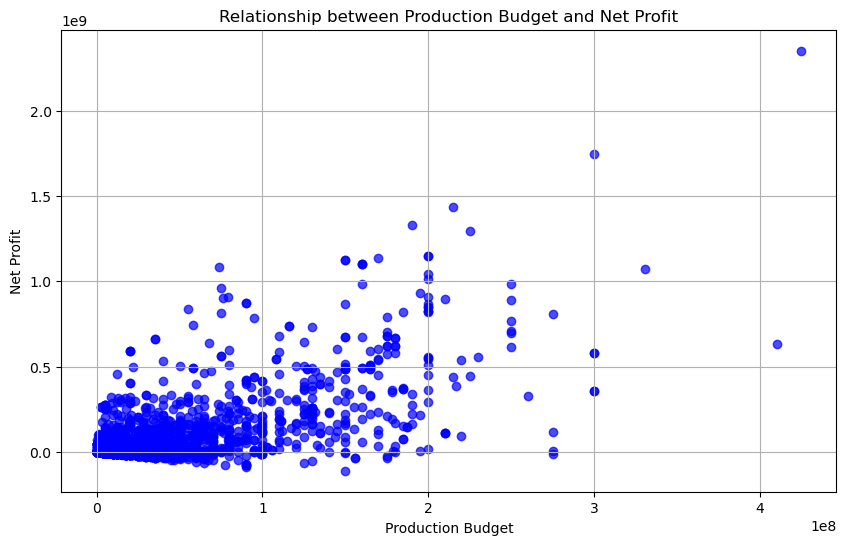

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x=merged_dataset['production_budget'], y=merged_dataset['net_profit'], color='blue', alpha=0.7)
plt.title('Relationship between Production Budget and Net Profit')
plt.xlabel('Production Budget')
plt.ylabel('Net Profit')
plt.grid(True)  # Add grid for better readability

plt.show()

The correlation value is 0.6793. This shows that there's a moderately strong positive correlation between Production Budget and Net Profit.

In [25]:
correlationBudget =  merged_dataset['production_budget'].corr(merged_dataset['net_profit'])
round(correlationBudget, 4)

0.6793

### Mapping genre into English for readability
[The Movie Database Support](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee "The Movie Database Support")

In [26]:
genre_mapping = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western',
}

def map_genre(genre_ids):
    try:
        genre_list = eval(genre_ids)
        if genre_list:
            return genre_mapping.get(genre_list[0], 'Unknown')
    except (SyntaxError, IndexError):
        pass
    return 'Unknown'

merged_dataset['genre'] = merged_dataset['genre_ids'].apply(map_genre)

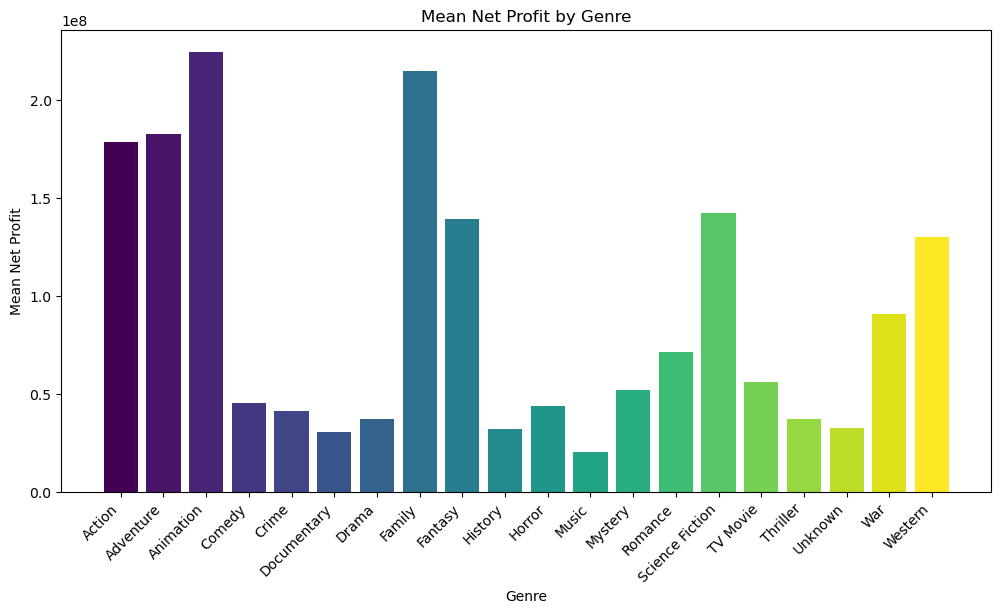

In [27]:
mean_net_profit_by_genre = merged_dataset.groupby('genre')['net_profit'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_net_profit_by_genre)))
# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(mean_net_profit_by_genre.index, mean_net_profit_by_genre, color= colors)
plt.title('Mean Net Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Net Profit')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

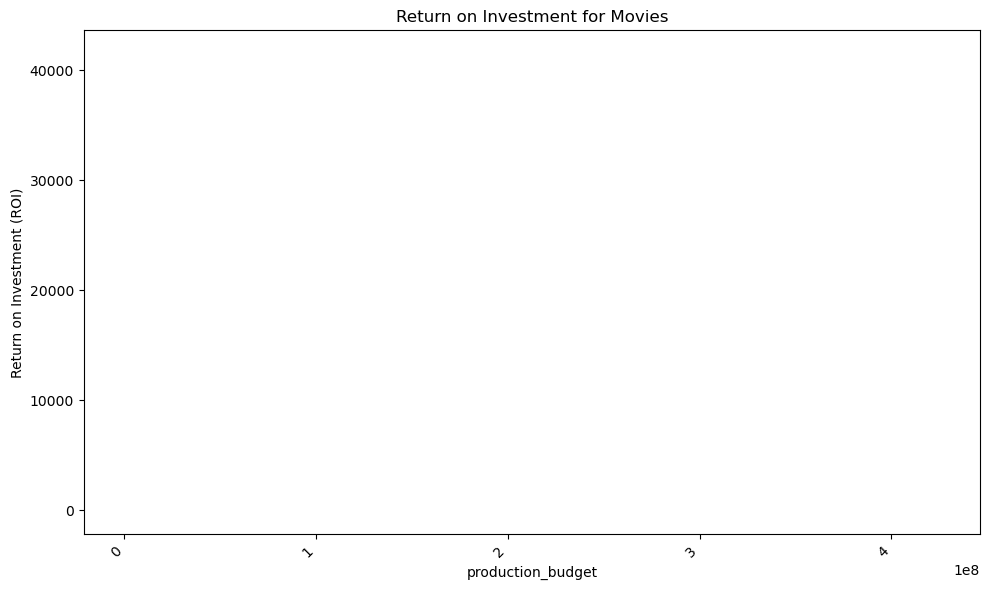

In [28]:
# Sort the DataFrame by 'roi' in descending order
merged_dataset = merged_dataset.sort_values(by='roi', ascending=False)

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(merged_dataset['production_budget'], merged_dataset['roi'], color='skyblue')
plt.xlabel('production_budget')
plt.ylabel('Return on Investment (ROI)')
plt.title('Return on Investment for Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [29]:
# bar plot of IMDb ratings against movie duration
meanMovie_length = imbReviews_clean.groupby('averagerating')['runtime_minutes'].mean()
plt.figure(figsize=(12, 6))
plt.bar(imbReviews_clean['runtime_minutes'], imbReviews_clean['averagerating'], data=imbReviews_clean, alpha=0.5, color='skyblue')
plt.title('IMDb Ratings vs. Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

In [ ]:
correlationImb = imbReviews_clean['runtime_minutes'].corr(imbReviews_clean['averagerating'])
correlationImb

-0.006963469265963989